In [127]:
from IPython.display import Image
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [191]:
url_normal = "./dt/test/NORMAL/IM-0003-0001.jpeg"
url_pneumonia = "./dt/test/PNEUMONIA/person145_bacteria_696.jpeg"
url_normal_2 = "./dt/test/NORMAL/IM-0001-0001.jpeg"
url_pneumonia_2 = "./dt/test/PNEUMONIA/person1647_virus_2848.jpeg"

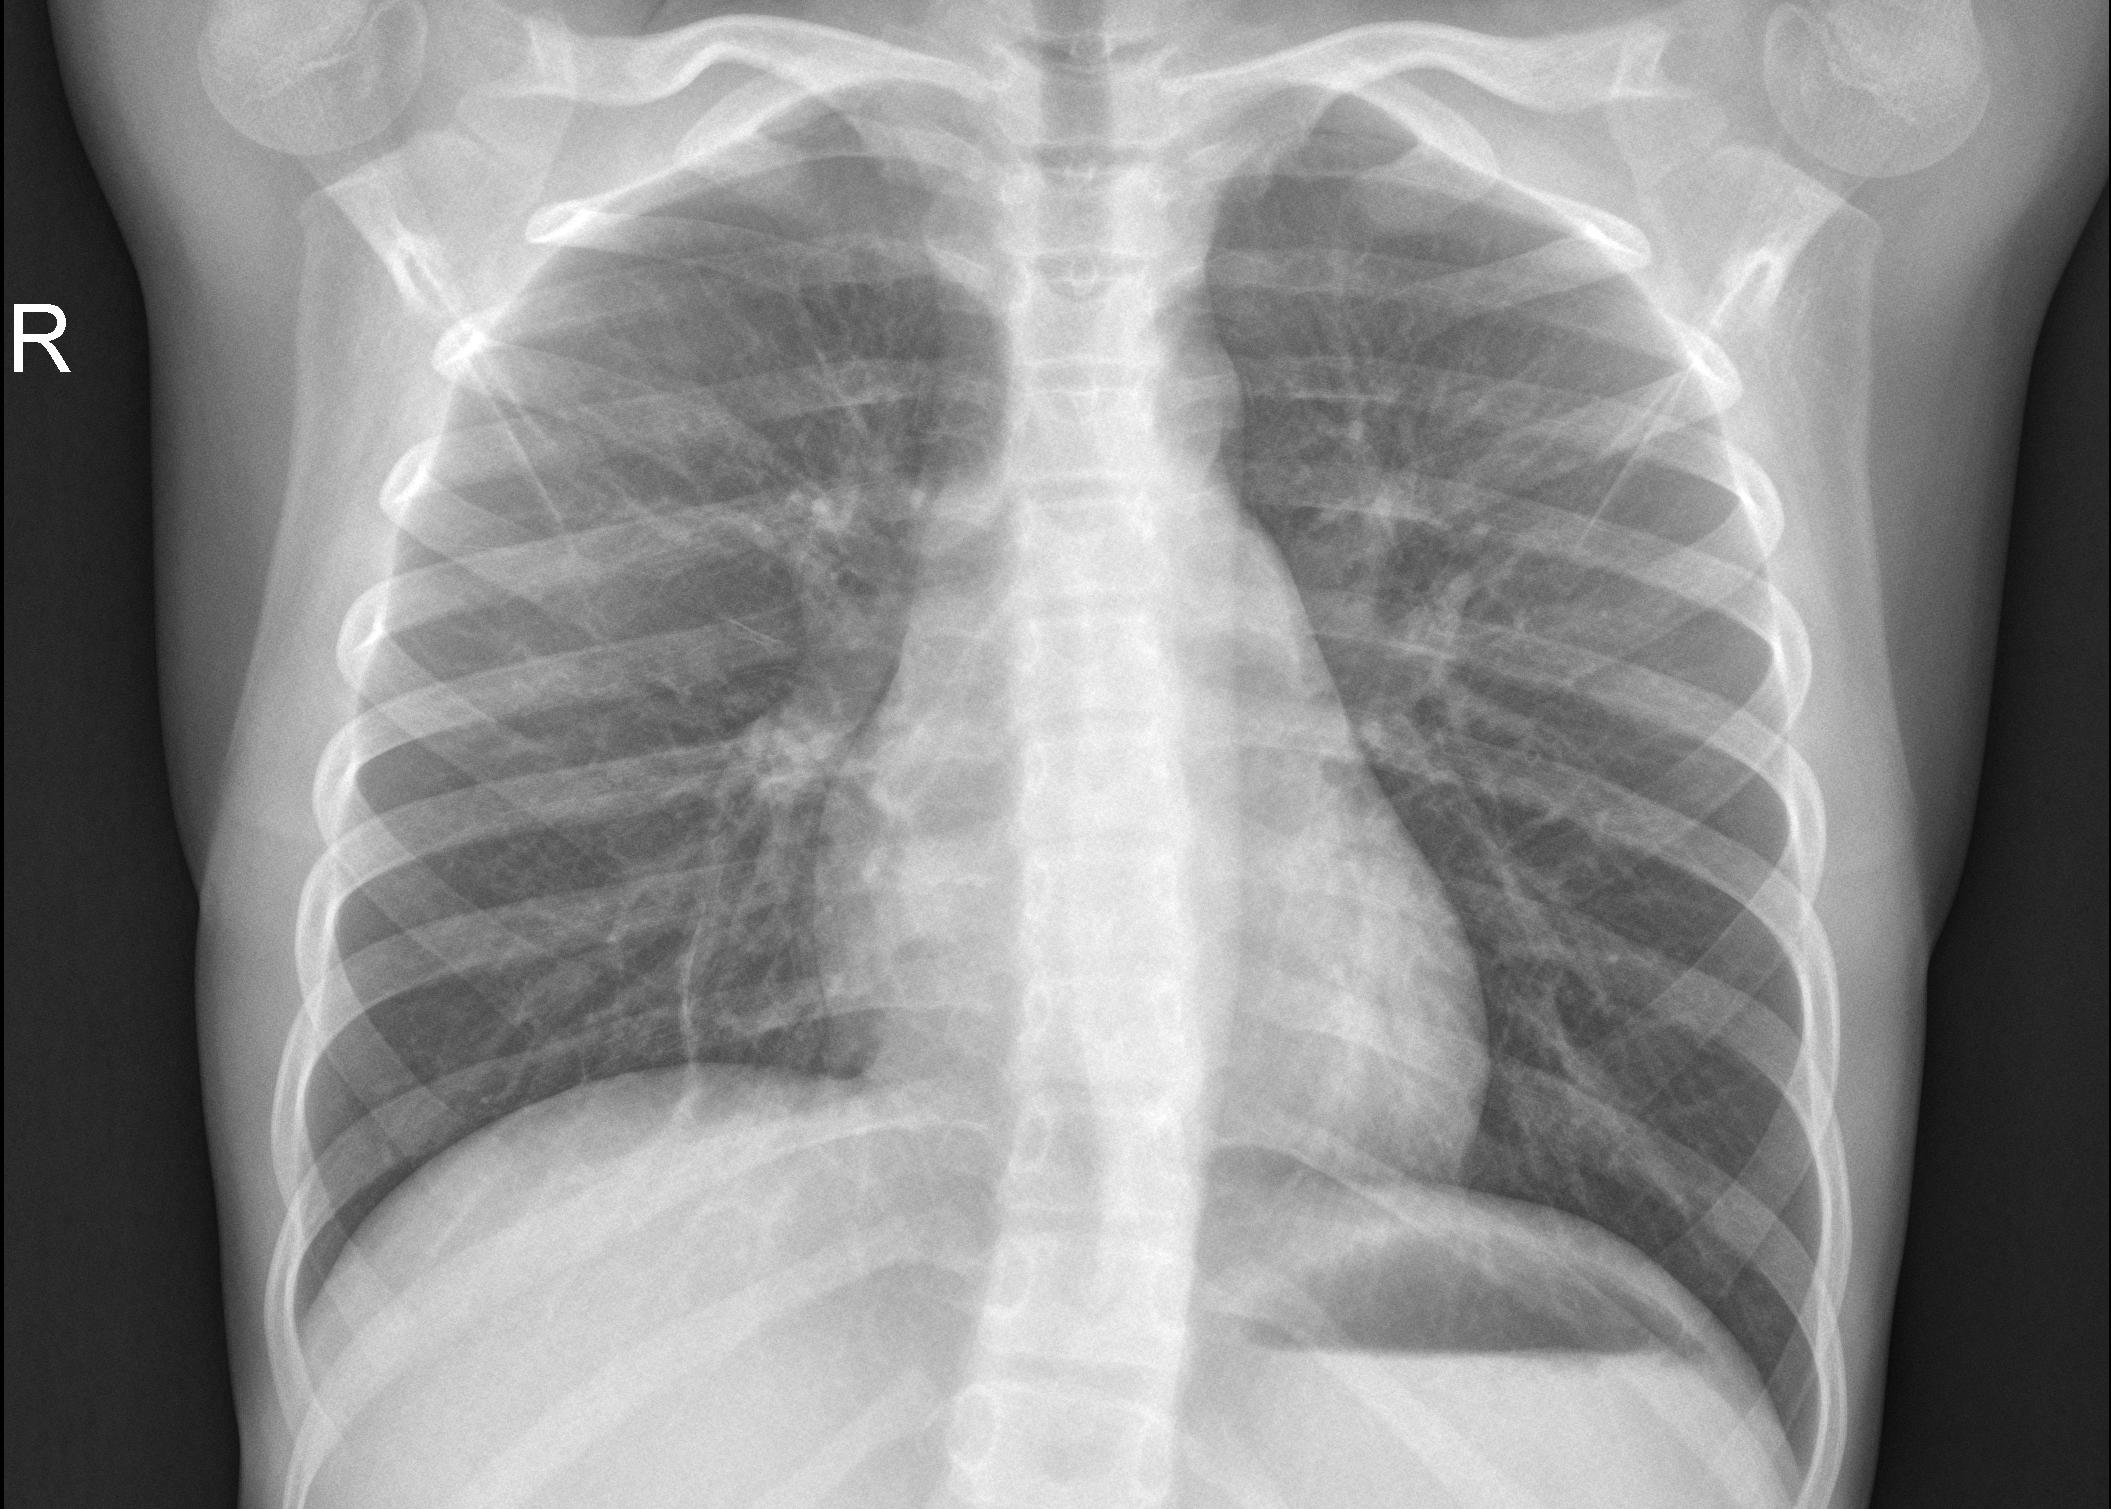

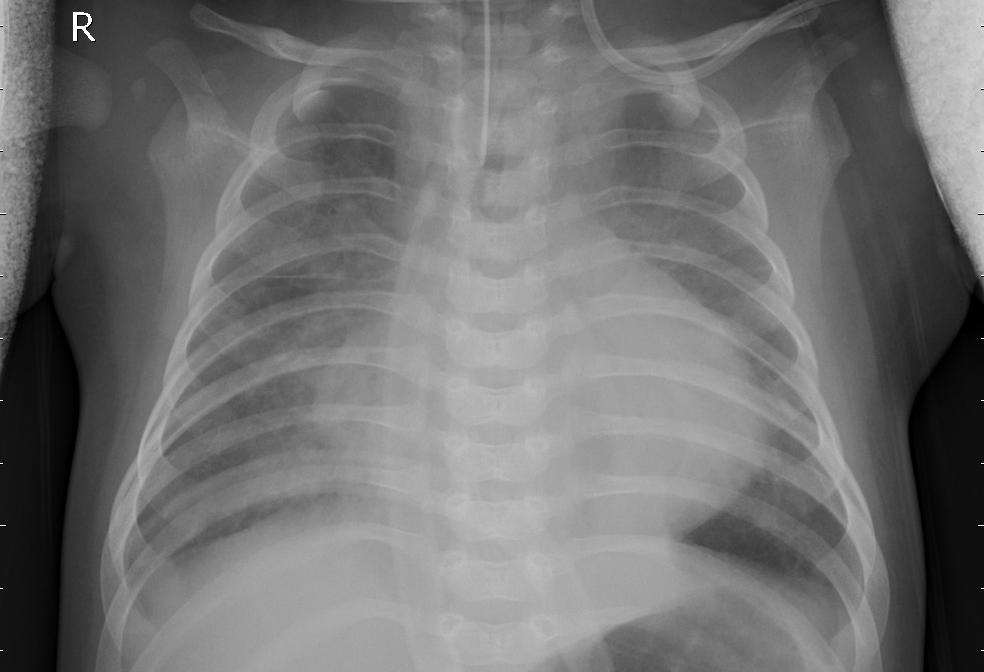

In [192]:
display(Image(url_normal, height = 100, width = 100))
display(Image(url_pneumonia, height = 100, width = 100))

In [130]:
normal= cv.imread( url_normal, 0)
pneumonia= cv.imread( url_pneumonia,  0)

display(normal.shape, pneumonia.shape)

(1509, 2111)

(672, 984)

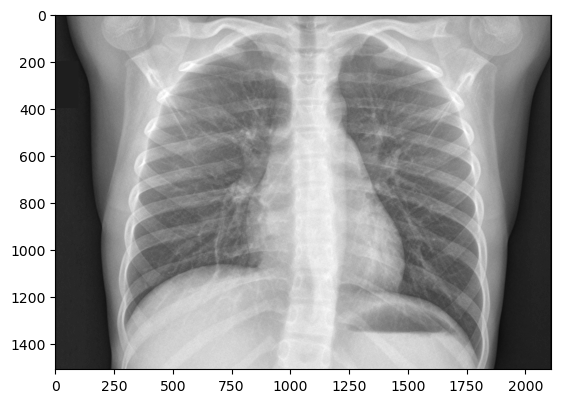

In [131]:
#hide r?
resized_image  = normal.copy()
resized_image[200:400, 0:100] = 30
plt.imshow(resized_image, cmap = 'gray')
plt.show()

In [132]:
def colors(url):
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 3, 1)
    plt.imshow(url, cmap = 'gray')
    plt.subplot(1, 3, 2)
    plt.imshow(url, cmap = 'coolwarm')
    plt.subplot(1, 3, 3)
    plt.imshow(url, cmap = 'PiYG')
    plt.show()

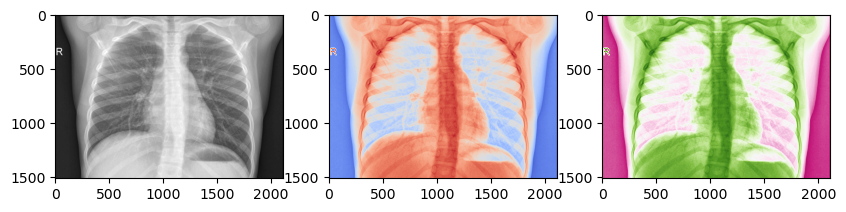

In [133]:
colors(normal)

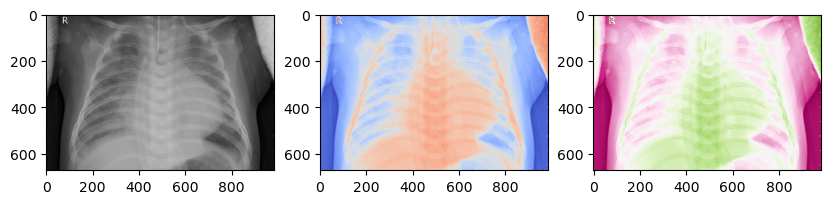

In [134]:
colors(pneumonia)

In [135]:
def hsv_channel(img):
    temp = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
    temp = cv.cvtColor(temp, cv.COLOR_BGR2HSV)
    h,s,v = cv.split(temp)

    plt.figure(figsize=(10, 10))
    plt.subplot(1, 3, 1)
    plt.imshow(h, cmap = 'gray')
    plt.subplot(1, 3, 2)
    plt.imshow(s, cmap = 'gray')
    plt.subplot(1, 3, 3)
    plt.imshow(v, cmap = 'gray')
    plt.show()

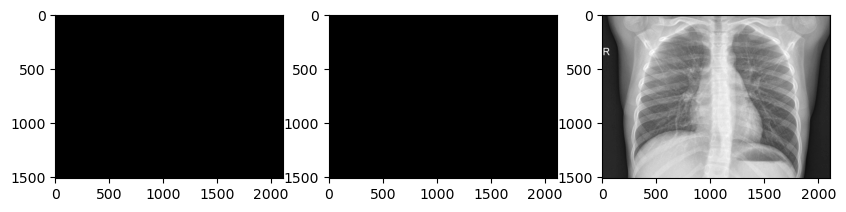

In [136]:
hsv_channel(normal)

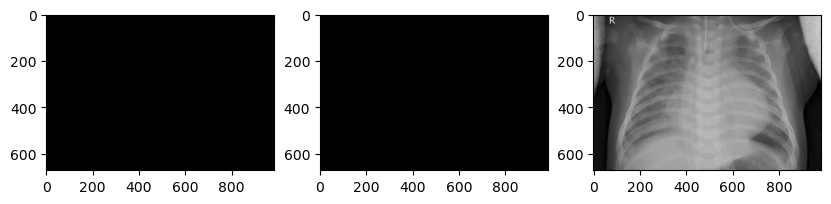

In [137]:
hsv_channel(pneumonia)

In [138]:
normal_bgr= cv.imread( url_normal, cv.IMREAD_COLOR)
pneumonia_bgr= cv.imread( url_pneumonia,  cv.IMREAD_COLOR)
normal_rgb = cv.cvtColor(normal_bgr, cv.COLOR_BGR2RGB)
pneumonia_rgb = cv.cvtColor(pneumonia_bgr, cv.COLOR_BGR2RGB)

In [139]:
mask_normal = np.ones(normal_rgb.shape, dtype="uint8") * 100
mask_pneumonia = np.ones(pneumonia_rgb.shape, dtype="uint8") * 100

normal_rgb_lighter = cv.add(normal_rgb, mask_normal)
normal_rgb_darker = cv.subtract(normal_rgb, mask_normal)
pneumonia_rgb_lighter = cv.add(pneumonia_rgb, mask_pneumonia)
pneumonia_rgb_darker = cv.subtract(pneumonia_rgb, mask_pneumonia)


In [140]:
def display_light(lighther, original, darker):
    plt.figure(figsize=[18, 5])
    plt.subplot(131)
    plt.imshow(lighther)
    plt.title("lighther")
    plt.subplot(132)
    plt.imshow(original)
    plt.title("Original")
    plt.subplot(133)
    plt.imshow(darker)
    plt.title("Darker")

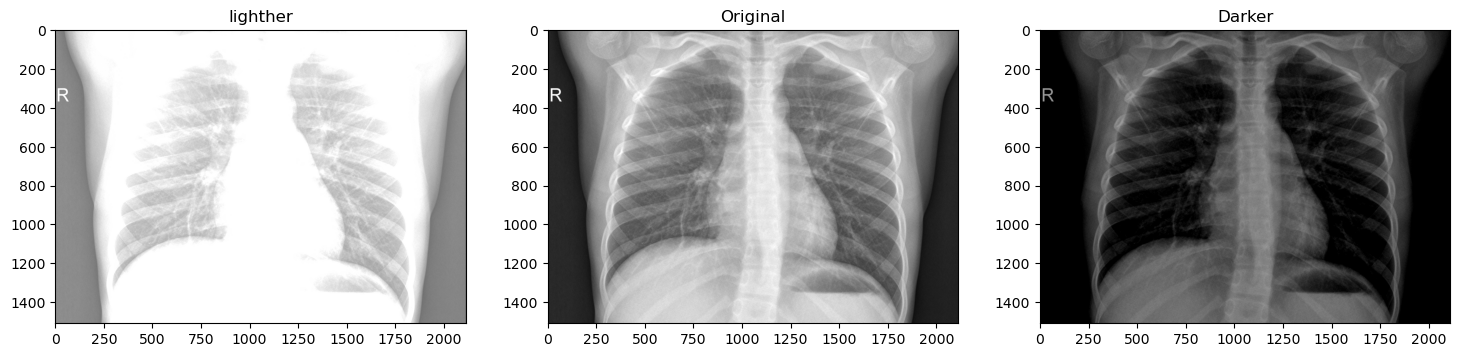

In [141]:
display_light(normal_rgb_lighter, normal_rgb, normal_rgb_darker)

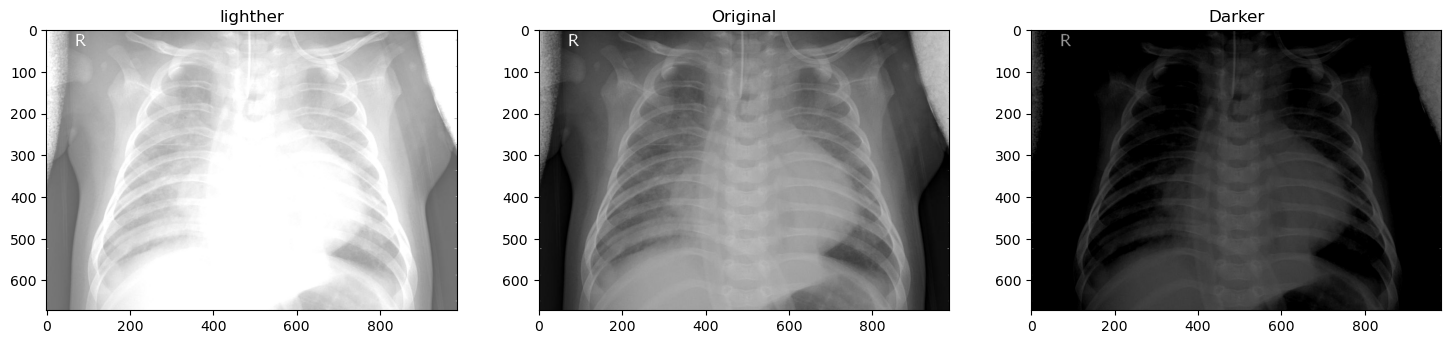

In [142]:
display_light(pneumonia_rgb_lighter, pneumonia_rgb, pneumonia_rgb_darker)

In [143]:
def display_contrast(less_contrast, original, more_contrast):
    plt.figure(figsize=[18, 5])
    plt.subplot(131)
    plt.imshow(less_contrast, cmap = 'gray')
    plt.title("less_contrast")
    plt.subplot(132)
    plt.imshow(original, cmap = 'gray')
    plt.title("Original")
    plt.subplot(133)
    plt.imshow(more_contrast, cmap = 'gray')
    plt.title("more_contrast")

In [156]:
normal_lower_contrast   = np.uint8(np.clip(cv.multiply(normal, 0.9), 0, 255))
normal_higher_contrast = np.uint8(np.clip(cv.multiply(normal, 1.1), 0, 255))
pneumonia_lower_contrast   = np.uint8(np.clip(cv.multiply(pneumonia, 0.9), 0, 255))
pneumonia_higher_contrast = np.uint8(np.clip(cv.multiply(pneumonia, 1.1), 0, 255))

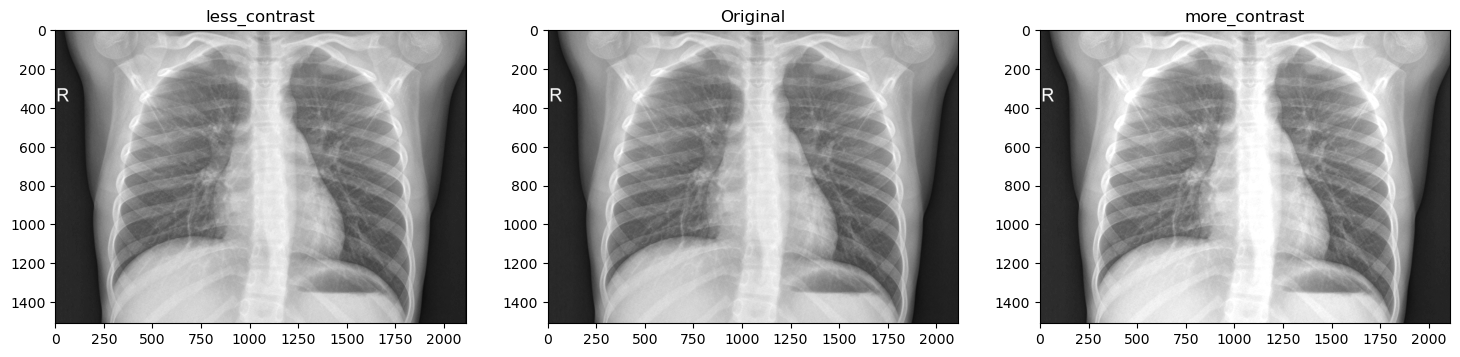

In [157]:
display_contrast(normal_lower_contrast, normal_rgb, normal_higher_contrast)

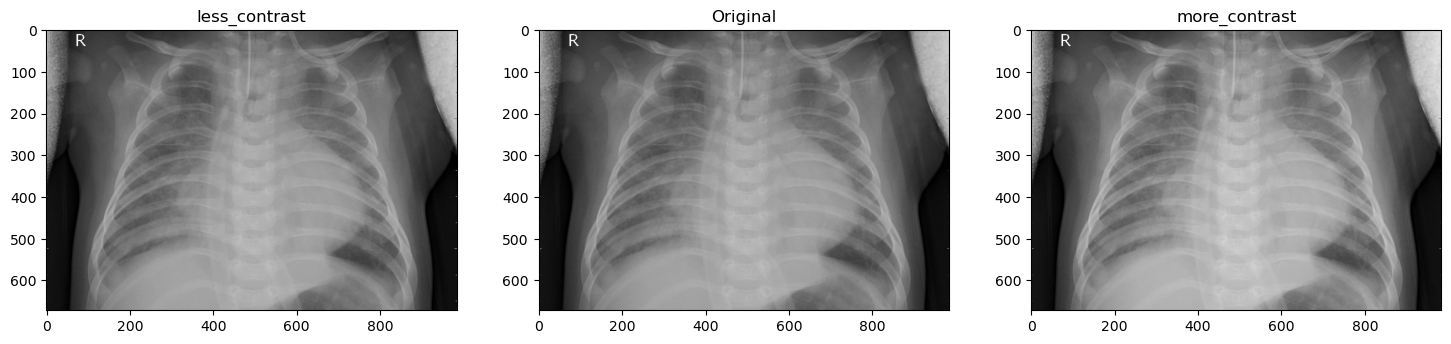

In [158]:
display_contrast(pneumonia_lower_contrast, pneumonia_rgb, pneumonia_higher_contrast)

In [202]:
retval_normal, normal_thresh = cv.threshold(normal, 100, 255, cv.THRESH_TOZERO)
retval_pneumonia, pneumonia_thresh = cv.threshold(pneumonia, 100, 255, cv.THRESH_TOZERO)

# normal_thresh = cv.adaptiveThreshold(normal, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 7)
# pneumonia_thresh = cv.adaptiveThreshold(pneumonia, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 7)

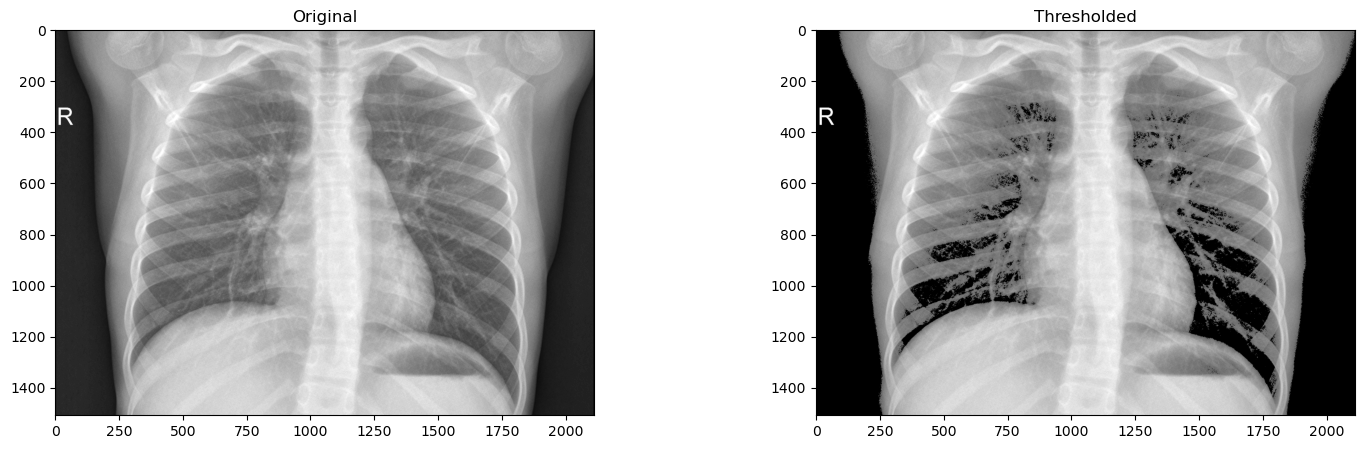

In [203]:
plt.figure(figsize=(18, 5))
plt.subplot(1,2,1)
plt.imshow(normal, cmap="gray")
plt.title("Original")
plt.subplot(1,2,2)
plt.imshow(normal_thresh, cmap="gray")
plt.title("Thresholded")
plt.show()

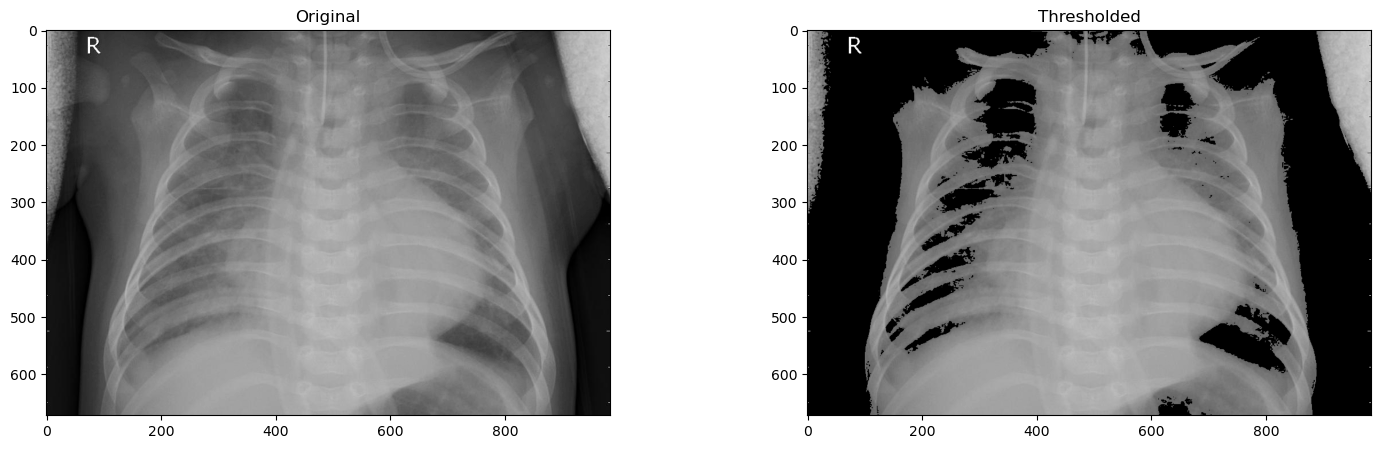

In [195]:
plt.figure(figsize=(18, 5))
plt.subplot(1,2,1)
plt.imshow(pneumonia, cmap="gray")
plt.title("Original")
plt.subplot(1,2,2)
plt.imshow(pneumonia_thresh, cmap="gray")
plt.title("Thresholded")
plt.show()

In [210]:
normal_2 = cv.imread(url_normal_2, cv.IMREAD_GRAYSCALE)
pneumonia_2 = cv.imread(url_pneumonia_2, cv.IMREAD_GRAYSCALE)
retval_normal_2, normal_thresh_2 = cv.threshold(normal_2, 100, 255, cv.THRESH_TOZERO)
retval_pneumonia_2, pneumonia_thresh_2 = cv.threshold(pneumonia_2, 100, 255, cv.THRESH_TOZERO)

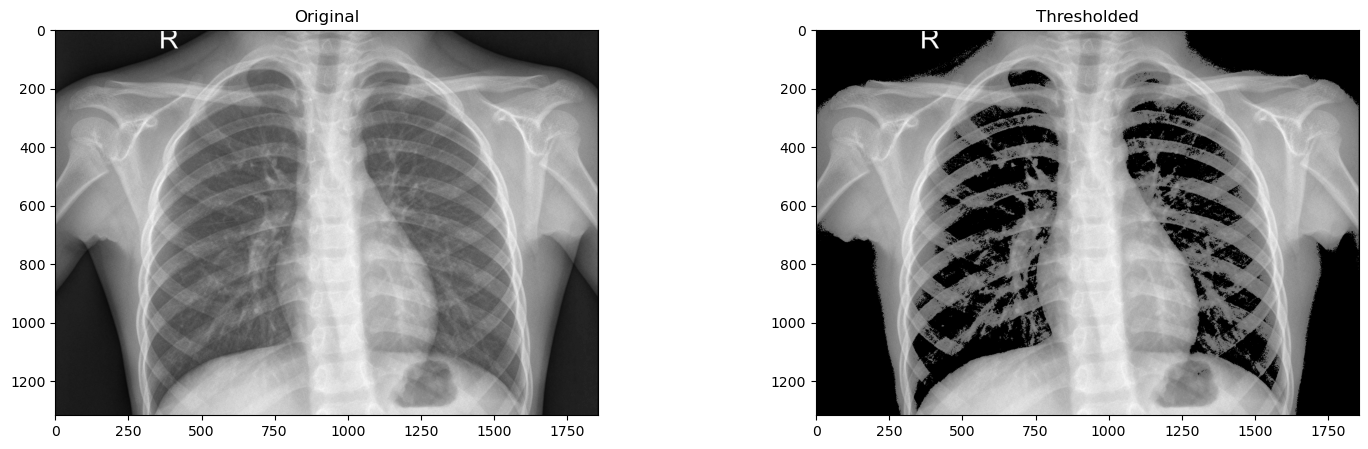

In [211]:
plt.figure(figsize=(18, 5))
plt.subplot(1,2,1)
plt.imshow(normal_2, cmap="gray")
plt.title("Original")
plt.subplot(1,2,2)
plt.imshow(normal_thresh_2, cmap="gray")
plt.title("Thresholded")
plt.show()

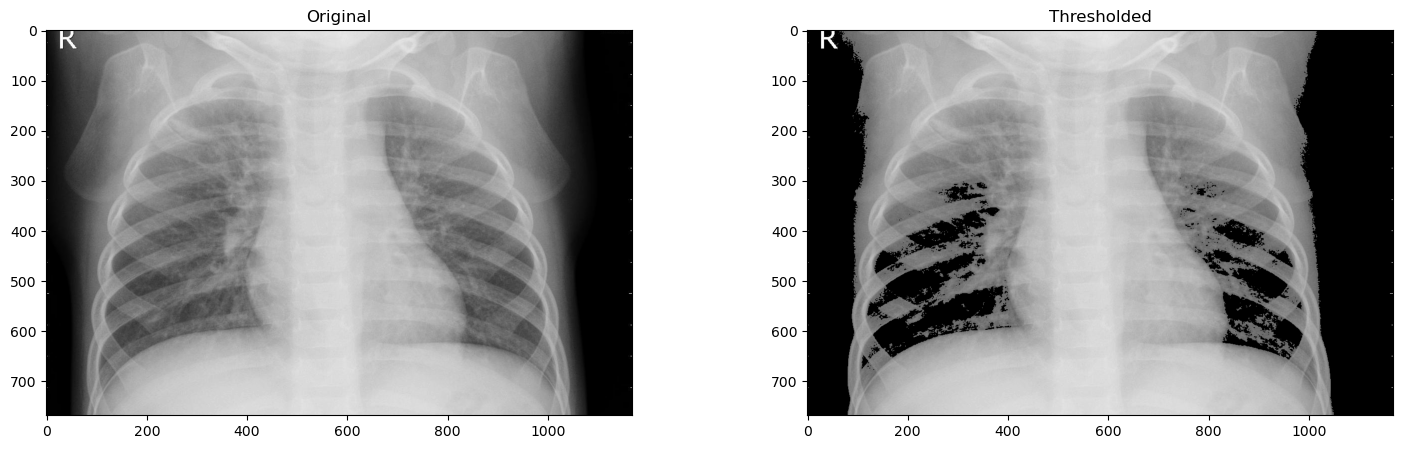

In [212]:
plt.figure(figsize=(18, 5))
plt.subplot(1,2,1)
plt.imshow(pneumonia_2, cmap="gray")
plt.title("Original")
plt.subplot(1,2,2)
plt.imshow(pneumonia_thresh_2, cmap="gray")
plt.title("Thresholded")
plt.show()